In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

import seaborn as sns

import plotly 
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [2]:
df = pd.read_csv('data_cleaned_more.csv')

In [3]:
df.head()

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Boligtype,Eieform_bolig,Soverom,Primærrom,...,heis,parkering,hage,sentrum,toppleilighet,Alder,Energimerking_encoded,Aksje,Andel,Selveier
0,"St. Halvards gate 25E, 0192 Oslo",3850000.0,0.0,76000.0,3926000.0,3964.00,Leilighet,Selveier,1,48.0,...,1,1,0,0,0,81,14.0,0,0,1
1,"Selvbyggerveien 143, 0591 Oslo",3200000.0,73058.0,8009.0,3281067.0,2768.09,Leilighet,Andel,1,35.0,...,0,0,0,0,0,68,1.0,0,1,0
2,"Gregers Grams vei 6C, 0382 Oslo",18250000.0,0.0,471920.0,18721920.0,2167.00,Enebolig,Selveier,4,208.0,...,0,0,1,0,0,5,29.0,0,0,1
3,"Brochmanns gate 7, 0470 Oslo",4600000.0,101699.0,127039.0,4828738.0,2768.09,Leilighet,Selveier,2,54.0,...,1,0,0,0,0,63,10.0,0,0,1
4,"Messepromenaden 10, 0279 Oslo",7700000.0,0.0,193842.0,7893842.0,3237.00,Leilighet,Selveier,2,65.0,...,1,0,0,0,0,16,22.0,0,0,1


In [4]:
df.columns

Index(['Address', 'Prisantydning', 'Fellesgjeld', 'Omkostninger', 'Totalpris',
       'Felleskost', 'Boligtype', 'Eieform_bolig', 'Soverom', 'Primærrom',
       'Bruksareal', 'Etasje', 'Byggeår', 'Energimerking', 'Beskrivelse',
       'Eiendomsmegler', 'avstand', 'balkong', 'utsikt', 'garasje', 'heis',
       'parkering', 'hage', 'sentrum', 'toppleilighet', 'Alder',
       'Energimerking_encoded', 'Aksje', 'Andel', 'Selveier'],
      dtype='object')

### The Totalpris is  Prisantydning + Omkostninger + Fellesgjeld. The price of interest for me is the Prisantydning, because the Prisantydning of an appartment or a house is determined based on some parameters such as number of bedrooms, areal, ageing, floor and much more. So, in my analysis I will be focusing on Prisantydning.

In [5]:
px.pie(df, names='Boligtype', hole=.3, title='Percentages of Bolig by type')

In [6]:
np.round(df['Energimerking'].value_counts(normalize = True) * 100, 1)[:10].iplot(
    kind = 'bar', title = 'Top 10 most common Energimerking in the dataset')

In [7]:
np.round(df['Eiendomsmegler'].value_counts(normalize = True) * 100, 1)[1:11].iplot(
    kind = 'bar', title = 'Top 10 most hired Eiendomsmegler to sell a residence in Oslo', color = 'red')

In [8]:
fig = px.pie(df, names='Eieform_bolig', color='Eieform_bolig',
             color_discrete_map={'Selveier':'red',
                                 'Andel':'royalblue',
                                 'Aksje':'orange'}, title='Percentages of Bolig by type')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [9]:
df['Soverom'].value_counts().iplot(kind = 'bar', title = 'Number of bedrooms')

In [10]:
px.histogram(df, x = 'Prisantydning', marginal = 'box', title = 'Residences Prices', 
            labels = {'Prisantydning':'Prisantydning in Millions', 'count':'count'})

In [11]:
px.histogram(df, x = 'Alder', marginal = 'box', title = 'Residence age (alder)', range_x = [-10, 200])

##### Check correlation between features, and check if my hypothesis are correct.  

In [12]:
# my guesses:

# Primærrom will has a high correlation on Prisantydning
# Soverom will have a high correlation on Prisantydning

In [13]:
px.scatter(df, x = 'Prisantydning', y = 'Primærrom', title = 'Correlation between Primærrom and Prisantydning',color_discrete_sequence = ['red'],
           labels = {'Prisantydning':'Prisantydning in Millions', 'Primærrom':'Primærrom in m²'}, trendline = 'ols', trendline_color_override = 'black')

# seems like Primærrom and Prisantydning have a positive correlation

In [14]:
px.scatter(df, x = 'Prisantydning', y = 'Soverom', title = 'Correlation between Soverom and Prisantydning',color_discrete_sequence = ['red'],
           labels = {'Prisantydning':'Prisantydning in Millions', 'Primærrom':'Primærrom in m²'}, trendline = 'ols', trendline_color_override = 'blue')

# seems like Soverom and Prisantydning have a positive correlation

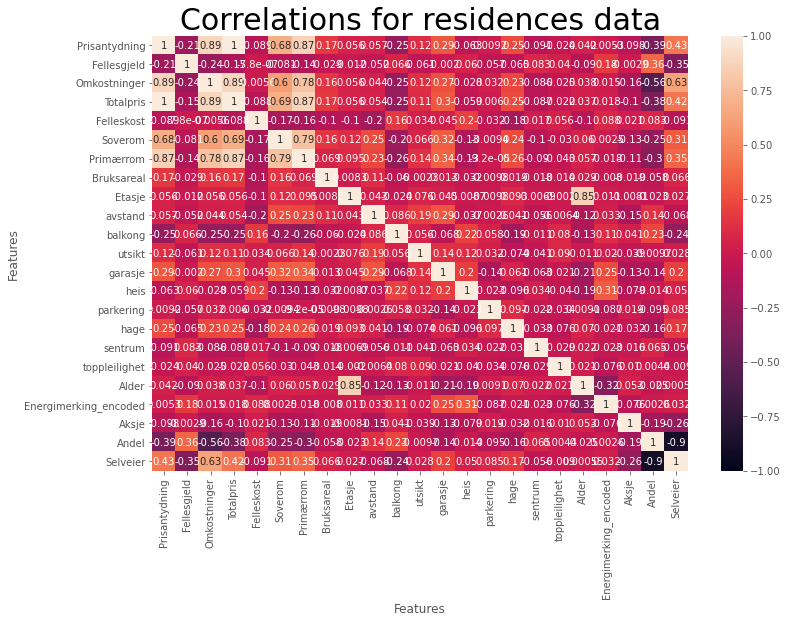

In [15]:
corr = df.drop('Byggeår', axis = 1).corr()
sns.heatmap(corr, annot=True, vmin=-1)
plt.title('Correlations for residences data', size=30)
plt.xlabel('Features', size=12)
plt.ylabel('Features', size=12)
plt.show()

In [16]:
px.imshow(corr, width = 1000, height = 700)

In [17]:
#corr.unstack() 

In [18]:
corr_pairs = corr.unstack()       
sorted_corr = corr_pairs.sort_values()

In [19]:
highest_corr = sorted_corr[sorted_corr > 0.5] # return correlations greater than 0.5
highest_corr.sort_values(ascending=False)[23:] # return highest values where correlation is not 1.0

Totalpris      Prisantydning    0.997707
Prisantydning  Totalpris        0.997707
Omkostninger   Totalpris        0.890126
Totalpris      Omkostninger     0.890126
Prisantydning  Omkostninger     0.889661
Omkostninger   Prisantydning    0.889661
Totalpris      Primærrom        0.868813
Primærrom      Totalpris        0.868813
               Prisantydning    0.867042
Prisantydning  Primærrom        0.867042
Alder          Etasje           0.853187
Etasje         Alder            0.853187
Soverom        Primærrom        0.787280
Primærrom      Soverom          0.787280
Omkostninger   Primærrom        0.781689
Primærrom      Omkostninger     0.781689
Totalpris      Soverom          0.687267
Soverom        Totalpris        0.687267
               Prisantydning    0.684505
Prisantydning  Soverom          0.684505
Selveier       Omkostninger     0.626024
Omkostninger   Selveier         0.626024
Soverom        Omkostninger     0.601643
Omkostninger   Soverom          0.601643
dtype: float64

In [20]:
px.scatter(df, x = 'Prisantydning', y = 'Omkostninger', title = 'Correlation between Omkostninger and Prisantydning',color_discrete_sequence = ['red'],
           labels = {'Prisantydning':'Prisantydning in Millions', 'Omkostninger':'Omkostninger in Millions'}, trendline = 'ols', trendline_color_override = 'black')

# Prisantydning has a positive correlation with Omkostninger. This makes sense, because Omkostninger is a % of the Prisantydning
# so when Prisantydning increases the Omkostninger also increases.

In [21]:
parkering_by_bolig_type = pd.crosstab(df['Boligtype'], df['parkering'])
parkering_by_bolig_type.columns = ['no_parkering', 'yes_parkering']

In [22]:
parkering_by_bolig_type

,no_parkering,yes_parkering
Boligtype,,
Enebolig,62,4
Leilighet,757,45
Rekkehus,20,3
Tomannsbolig,29,4


In [23]:
boligtype_count = df['Boligtype'].value_counts().sort_index()

In [24]:
combine_boligtype_df = pd.concat([parkering_by_bolig_type, boligtype_count], axis = 1)
combine_boligtype_df.columns = ['no_parkering', 'yes_parkering', 'count']

In [25]:
combine_boligtype_df['no_parkering'] = np.round((combine_boligtype_df['no_parkering'] * 100 / combine_boligtype_df['count']) , 1)
combine_boligtype_df['yes_parkering'] = np.round((combine_boligtype_df['yes_parkering'] * 100 / combine_boligtype_df['count']) , 1)

In [26]:
combine_boligtype_df.drop('count', axis = 1, inplace = True)

In [27]:
combine_boligtype_df.sort_values('yes_parkering', ascending = False).iplot(kind = 'bar', title = 'Parkering availability by boligtype')

In [28]:
px.histogram(df, x = 'Fellesgjeld', marginal = 'box', title = 'Residence age (alder)')

In [29]:
df.columns

Index(['Address', 'Prisantydning', 'Fellesgjeld', 'Omkostninger', 'Totalpris',
       'Felleskost', 'Boligtype', 'Eieform_bolig', 'Soverom', 'Primærrom',
       'Bruksareal', 'Etasje', 'Byggeår', 'Energimerking', 'Beskrivelse',
       'Eiendomsmegler', 'avstand', 'balkong', 'utsikt', 'garasje', 'heis',
       'parkering', 'hage', 'sentrum', 'toppleilighet', 'Alder',
       'Energimerking_encoded', 'Aksje', 'Andel', 'Selveier'],
      dtype='object')

In [30]:
px.box(df, x = 'Prisantydning', y = 'Boligtype', notched = True,title = 'Distribution of Prisantydning by Boligtype')

In [31]:
px.box(df, x = 'Prisantydning', y = 'Eieform_bolig', title = 'Distribution of Prisantydning by Eieform')


In [32]:
leilighet_heis = np.round(pd.crosstab(df['Boligtype'], df['heis']).loc['Leilighet'] * 100 / 802, 1).reset_index()
leilighet_heis.columns = ['heis', 'percentage']
leilighet_heis['heis'].replace({0:'no_heis', 1:'yes_heis'}, inplace = True)

In [33]:
px.histogram(leilighet_heis, x = 'heis', y = 'percentage', title = 'Percentage of appartments with elevator vs these with no elevator')